In [6]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'/home/beans/bespoke')

from constants import *
from imports import *
from loaders import *
from input_prep import *
from models import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
m = EffNet().to(device)
model_stem = "12.30_avg"
m.load_state_dict(torch.load(f"{BESPOKE_ROOT}/models/m_{model_stem}.torch"), strict=False)
m.eval()
backbone = m.backbone

In [23]:
m

EffNet(
  (backbone): EfficientNet(
    (conv_stem): Conv2d(4, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): SiLU(inplace=True)
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
          (bn1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act1): SiLU(inplace=True)
          (se): SqueezeExcite(
            (conv_reduce): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
            (act1): SiLU(inplace=True)
            (conv_expand): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
            (gate): Sigmoid()
          )
          (conv_pw): Conv2d(48, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn2): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True

In [8]:
import optviz_utils, optviz

In [15]:
r = optviz.render_viz(backbone, viz_ix=2)

100%|██████████████████████████████████████████████████████████████████████| 512/512 [00:20<00:00, 24.40it/s]


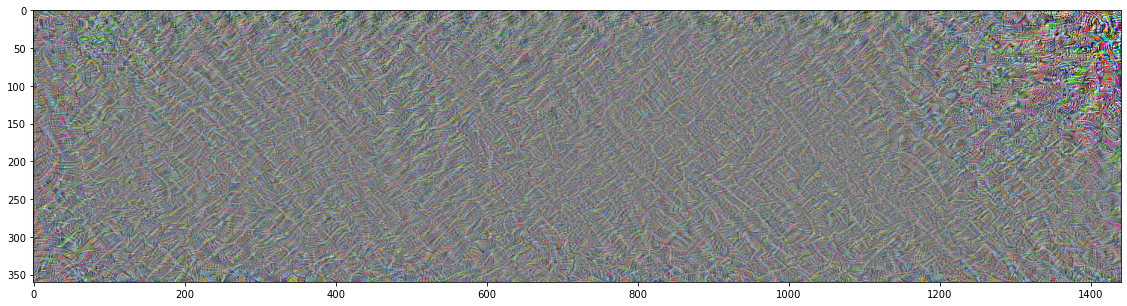

In [16]:
img = (r[0]*255).astype('uint8')[0][:, :, :3]
plt.figure(figsize=(20,5))
plt.imshow(img)

(array([  6665.,  15442.,  64826., 223007., 470550., 473841., 215743.,
         63697.,  14972.,   6457.]),
 array([  0. ,  25.4,  50.8,  76.2, 101.6, 127. , 152.4, 177.8, 203.2,
        228.6, 254. ]),
 <BarContainer object of 10 artists>)

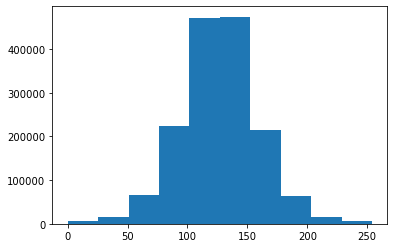

In [22]:
plt.hist(img.flatten())